## Presentation
Please find the slideshow presentation [here](https://docs.google.com/presentation/d/14uD1zIE6CEnc8c_PvxOxPLazJZEj5kHqmsB6oeqbqyY/edit?usp=sharing)

## Imports and utility functions

In [0]:
import numpy as np
import types
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'RdBu'

import sklearn.datasets as datasets
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline


def plot_decision_boundary(model, X, y, degree=1):
    """
    Use this to plot the decision boundary of a trained model.
    """
    grid_lim = np.array([[X[:,0].min(), X[:,0].max()], [X[:,1].min(), X[:,1].max()]])
    xx, yy = np.mgrid[grid_lim[0,0]:grid_lim[0,1]:.01, 
                      grid_lim[1,0]:grid_lim[1,1]:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    t = PolynomialFeatures(degree=degree, include_bias=False)
    _poly = t.fit_transform(grid)
    
    probs = model.predict_proba(_poly)[:, 1].reshape(xx.shape)
    
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y, s=100,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(grid_lim[0,0],grid_lim[0,1]), 
           ylim=(grid_lim[1,0],grid_lim[1,1]),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.gcf().set_size_inches(21, 14)
    return f, ax
  
  

def plot_history(h):
  
  fig, (ax1, ax2) = plt.subplots(1, 2)
  
  ax1.plot(h.history['loss'], label='Training Loss')
  ax1.plot(h.history['val_loss'], label='Test Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(fontsize=24)
  ax1.set_ylim(0, 1)
  
  ax2.plot(h.history['acc'], label='Training Accuracy')
  ax2.plot(h.history['val_acc'], label='Test Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(fontsize=24)
  ax2.set_ylim(0, 1)
  
  fig.suptitle('Evolution over epochs', fontsize=24)
  
  fig.set_size_inches(21, 14)


# Building a Neural Network Crash Course

### Important things to remember

1. Neural networks are not magic, just math
2. There are no recipes for building neural networks, only "best practices"
3. Neural networks can learn anything, given enough data

# Regression

First things first, let's import **keras**. Keras is a python library that makes it easier to use Google's Tensorflow, the most popular library for building neural networks. 

In [2]:
import keras

Using TensorFlow backend.


Let's use the Boston Housing dataset we used in Epoch 2.

In [3]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/bucharestschoolofai/epoch_2/master/train.csv')
data = pd.read_csv(file, delimiter=',', usecols=['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'Fireplaces'])

X = data.loc[:, :'GarageCars'].values
y = data.loc[:, 'SalePrice':].values

data.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice
0,8450,7,5,2003,856,2,0,2,208500
1,9600,6,8,1976,1262,2,1,2,181500
2,11250,7,5,2001,920,2,1,2,223500
3,9550,7,5,1915,756,1,1,3,140000
4,14260,8,5,2000,1145,2,1,3,250000


Let's define our model.

In [4]:
model = keras.models.Sequential()

# First layer needs the input shape to be specified. We're dealing with 8D points, so input_shape=(8,)
model.add(keras.layers.Dense(units=4, input_shape=(8,), activation='relu', name='layer_1'))

# ReLU for the activation function
model.add(keras.layers.Dense(units=4, activation='relu',  name='layer_2'))

# The final layer has 1 neuron because we predict one value, the price
model.add(keras.layers.Dense(units=1, activation='relu',  name='layer_3'))

# Loss is Mean Absolute Error. 
model.compile(loss='mean_absolute_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X, y, batch_size=1, epochs=10, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1168 samples, validate on 292 samples
Epoch 1/10
1168/1168 [==============================] - 2s 1ms/step - loss: 96217.5969 - val_loss: 59900.3897
Epoch 2/10
1168/1168 [==============================] - 1s 920us/step - loss: 62674.4697 - val_loss: 58538.2061
Epoch 3/10
1168/1168 [==============================] - 1s 908us/step - loss: 61178.9688 - val_loss: 57228.9321
Epoch 4/10
1168/1168 [==============================] - 1s 912us/step - loss: 59609.3676 - val_loss: 55907.9142
Epoch 5/10
1168/1168 [==============================] - 1s 911us/step - loss: 58101.7281 - val_loss: 54534.9203
Epoch 6/10
1168/1168 [==============================] - 1s 889us/step - loss: 56222.5695 - val_loss: 53664.3172
Epoch 7/10
1168/1168 [==============================] - 1s 917us/step - loss: 54540.6911 - val_loss: 51893.2884
Epoch 8/10
1168/1168 [==============================] - 1s 907us/step - loss: 52777.6451 - val_loss: 50328.6881
Epoch 9/10


## Coding Challenge: Make the neural network more powerful
- increase the number of neurons
- increase the number of layers
- change activation functions

# Classification

Let's get back to the moons dataset that we tackled in Epoch 3 using classical machine learning

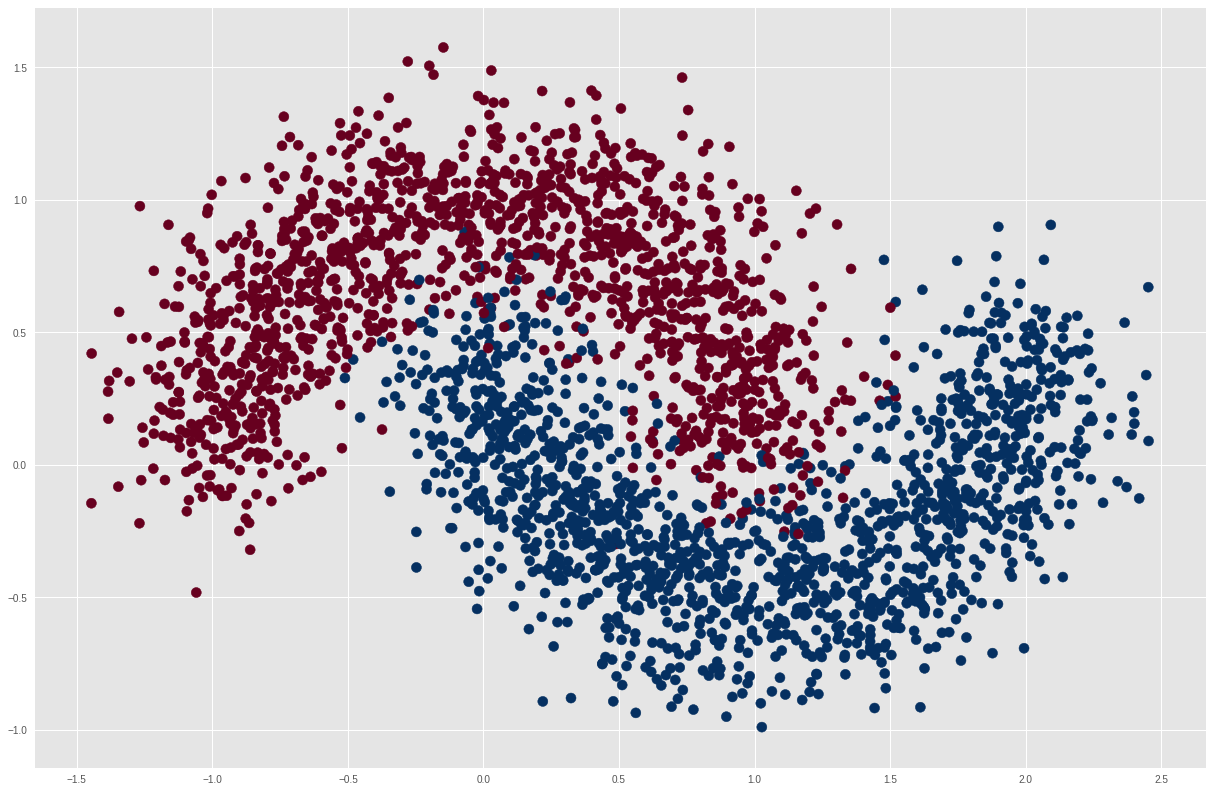

In [7]:
X, y = datasets.make_moons(3000, noise=0.2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

We'll try to use this dataset to learn about building neural networks. Later on we'll see how ca we teach neural model to "**read**" some numbers.

Let's build a neural network with 3 layers that can classify these points.

In [0]:
model = keras.models.Sequential()


# First layer needs the input shape to be specified. We're dealing with 2D points, so input_shape=(2,)
model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu', name='layer_1'))

# ReLU for the activation function
model.add(keras.layers.Dense(units=4, activation='relu',  name='layer_2'))

# Softmax activation to output probabilities 
model.add(keras.layers.Dense(units=2, activation='softmax',  name='layer_3'))

# Loss is crossentropy, like in LogisticRegression! Optimizer is Stochastic Gradient Descent and we are interested in accuracy.
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
layer_3 (Dense)              (None, 2)                 10        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


What's going on here? We've just made our model. But what does that mean? We actually create 3 matrices. Let's print them out:

In [10]:
for layer in model.layers:
  weights, bias = layer.get_weights()
  
  print(f"### Layer ", layer.name, "Neurons: ", layer.input_shape[1])
  print("Weights: \n", weights)
  print("Bias: ", bias)
  print()

### Layer  layer_1 Neurons:  2
Weights: 
 [[ 0.95943904 -0.4888389   0.04413605  0.6651683 ]
 [-0.6879513   0.24045753  0.2034862   0.798228  ]]
Bias:  [0. 0. 0. 0.]

### Layer  layer_2 Neurons:  4
Weights: 
 [[-0.5603918   0.1475715   0.7223471   0.2812118 ]
 [-0.6094612   0.25437623 -0.1427843   0.20178348]
 [ 0.64886886  0.1480121  -0.61574465 -0.24867356]
 [ 0.64666885 -0.8144502  -0.6318754  -0.7238917 ]]
Bias:  [0. 0. 0. 0.]

### Layer  layer_3 Neurons:  4
Weights: 
 [[-0.58282304  0.7770026 ]
 [-0.4792738   0.74638915]
 [ 0.3695426  -0.41247845]
 [ 0.597703   -0.84005165]]
Bias:  [0. 0.]



The shapes of these matrices are such that they connect the current layer to the next layer (i.e. the first matrix is 2x4 because the first layer has 2 neurons and the next one has 4 neurons).

Let's get to training!

In [11]:
model.fit(X, y, batch_size=1, epochs=5, validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 2s 963us/step - loss: 0.4728 - acc: 0.7400 - val_loss: 0.2925 - val_acc: 0.8800
Epoch 2/5
2400/2400 [==============================] - 2s 893us/step - loss: 0.3184 - acc: 0.8567 - val_loss: 0.2919 - val_acc: 0.8667
Epoch 3/5
2400/2400 [==============================] - 2s 903us/step - loss: 0.3068 - acc: 0.8633 - val_loss: 0.2703 - val_acc: 0.8883
Epoch 4/5
2400/2400 [==============================] - 2s 909us/step - loss: 0.3031 - acc: 0.8617 - val_loss: 0.3055 - val_acc: 0.8567
Epoch 5/5
2400/2400 [==============================] - 2s 904us/step - loss: 0.2993 - acc: 0.8671 - val_loss: 0.2517 - val_acc: 0.8867


(<Figure size 1512x1008 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f627387aa58>)

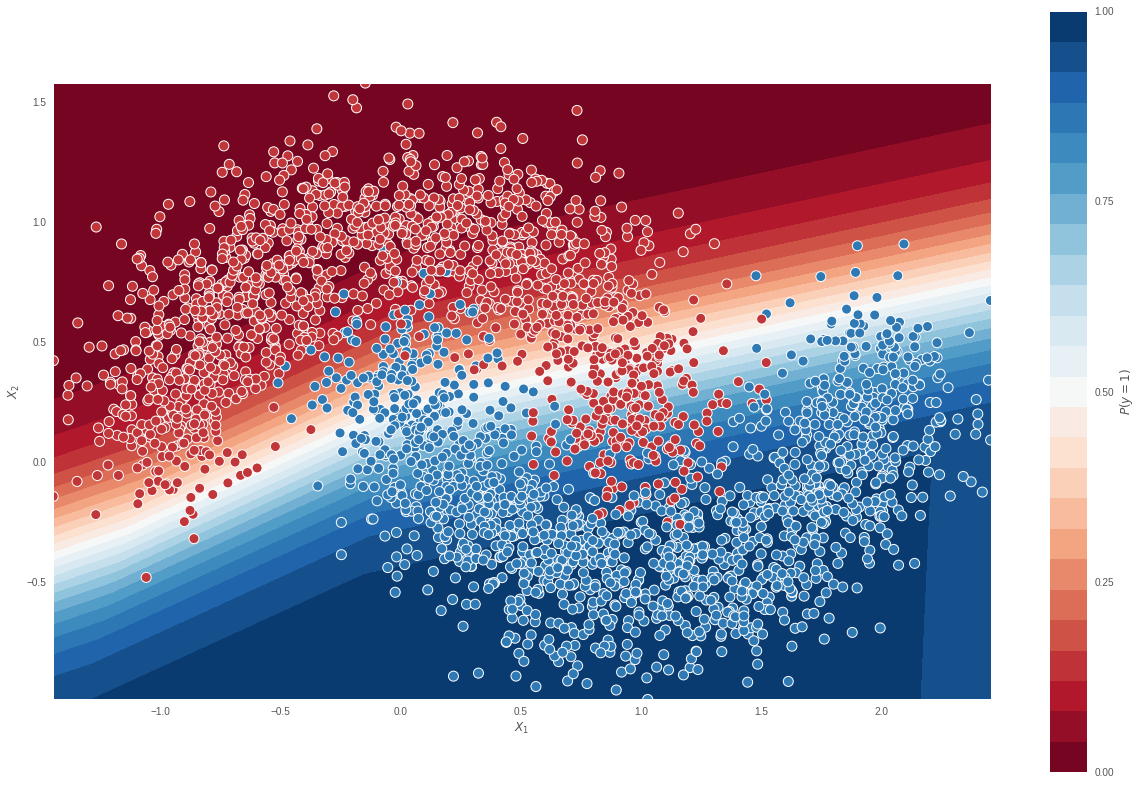

In [12]:
plot_decision_boundary(model, X, y)

## Coding Challenge: Make the neural network more powerful
- increase the number of neurons
- increase the number of layers
- change activation functions


# Initializers

We saw that the matrix weghits were some random numbers. In keras, we can specify the initialization function in the arguments. Let's initialize the weights with zeros and see what happens.

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu', kernel_initializer='zeros', bias_initializer='zeros'))

model.add(keras.layers.Dense(units=4, activation='relu'))

model.add(keras.layers.Dense(units=2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X, y, batch_size=1, epochs=5, validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 2s 1ms/step - loss: 0.6944 - acc: 0.5025 - val_loss: 0.6942 - val_acc: 0.4967
Epoch 2/5
2400/2400 [==============================] - 2s 951us/step - loss: 0.6950 - acc: 0.4850 - val_loss: 0.6954 - val_acc: 0.4967
Epoch 3/5
2400/2400 [==============================] - 2s 907us/step - loss: 0.6952 - acc: 0.4846 - val_loss: 0.6935 - val_acc: 0.4967
Epoch 4/5
2400/2400 [==============================] - 2s 905us/step - loss: 0.6939 - acc: 0.4971 - val_loss: 0.7010 - val_acc: 0.4967
Epoch 5/5
2400/2400 [==============================] - 2s 906us/step - loss: 0.6939 - acc: 0.5142 - val_loss: 0.6936 - val_acc: 0.4967


# Learning Rate

The learning rate hyperparameter can be very important, as a too low learning rate can make the model get stuck in a local minima, and a higher learning rate can make the model overshoot. 

A good rule of thumb is to start with a higher learning rate initially, and then decrease it as the learning progresses.

In [14]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))

model.add(keras.layers.Dense(units=4, activation='relu'))

model.add(keras.layers.Dense(units=2, activation='softmax'))

# TODO play with the learning rate hyperparameter
sgd = keras.optimizers.SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X, y, batch_size=1, epochs=5, validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 2s 1ms/step - loss: 0.5774 - acc: 0.6617 - val_loss: 0.3089 - val_acc: 0.8533
Epoch 2/5
2400/2400 [==============================] - 2s 920us/step - loss: 0.3061 - acc: 0.8646 - val_loss: 0.2495 - val_acc: 0.8917
Epoch 3/5
2400/2400 [==============================] - 2s 919us/step - loss: 0.2635 - acc: 0.8833 - val_loss: 0.2326 - val_acc: 0.9017
Epoch 4/5
2400/2400 [==============================] - 2s 917us/step - loss: 0.2018 - acc: 0.9258 - val_loss: 0.1566 - val_acc: 0.9417
Epoch 5/5
2400/2400 [==============================] - 2s 920us/step - loss: 0.1488 - acc: 0.9425 - val_loss: 0.1094 - val_acc: 0.9567


# Reading Digits (Classification Extended)

Let's teach a neural network to **READ** some digits. We will be using the classic [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


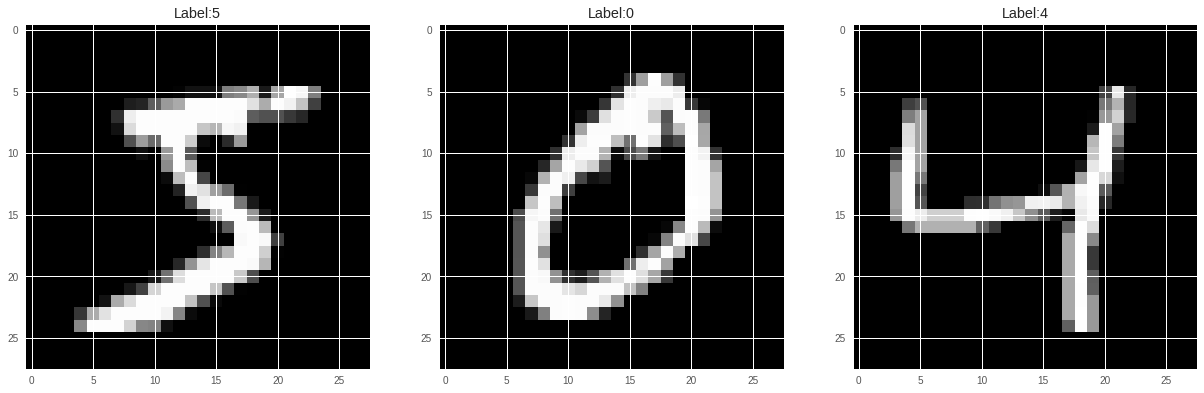

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_train[0], cmap='gray')
ax1.set_title('Label:' + str(y_train[0]))


ax2.imshow(x_train[1], cmap='gray')
ax2.set_title('Label:' + str(y_train[1]))

ax3.imshow(x_train[2], cmap='gray')
ax3.set_title('Label:' + str(y_train[2]))

fig.set_size_inches(21, 14)

To process these images with some fully connected neural network, we need to "flatten" them, because these types of layers can handle only vectors as input.

In [0]:
model = keras.models.Sequential()


model.add(keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

![](https://www.superdatascience.com/wp-content/uploads/2018/08/CNN_Step3_Img1.png)

Flattening inherently neglects valuable spatial information, therefore using fully-connected layers with flattening is not the best approach for analysing images.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


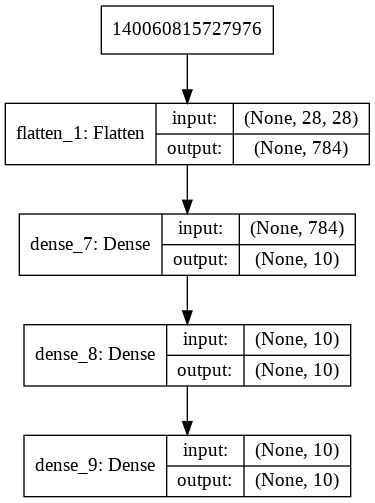

In [19]:
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True, to_file='model.png')

from IPython.display import Image

Image(filename='model.png', height=600)

In [20]:
h = model.fit(x_train / 255., y_train, # our data
              epochs=10, # number of passes
              batch_size=32, # number of images per training step
              validation_data=(x_test / 255., y_test)) # validation data

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5921 - acc: 0.8167 - val_loss: 0.3349 - val_acc: 0.9030
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3069 - acc: 0.9132 - val_loss: 0.2814 - val_acc: 0.9180
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2665 - acc: 0.9238 - val_loss: 0.2578 - val_acc: 0.9245
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2449 - acc: 0.9296 - val_loss: 0.2505 - val_acc: 0.9258
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2318 - acc: 0.9340 - val_loss: 0.2428 - val_acc: 0.9290
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2214 - acc: 0.9365 - val_loss: 0.2382 - val_acc: 0.9305
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2135 - acc: 0.9388 - val_loss: 0.2357 - val_acc

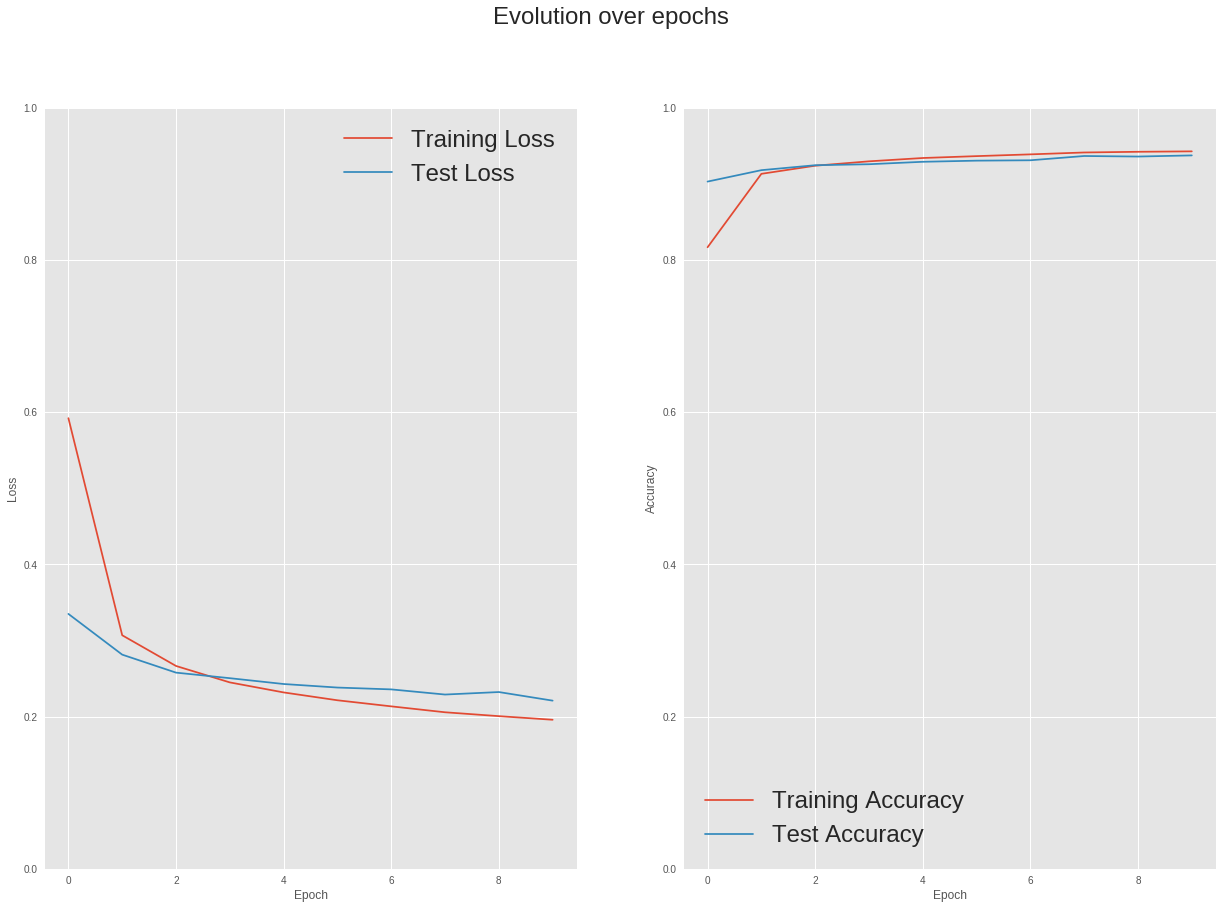

In [21]:
plot_history(h)

## Coding Challenge: Make the neural network more powerful
- increase the number of neurons
- increase the number of layers
- change activation functions


# But how to decide on how many layers and neurons?

No clear answer here. You'll have to decide the optimal architecture for your problem and data. But you can also take this formula as a guide:

$\begin{equation}
N_h = \dfrac{N_s}{\alpha * (N_i + N_o)}
\end{equation}$

$N_h$ = number of neurons in the hidden layers

$N_i$ = number of input neurons

$N_o$ = number of output neurons

$N_s$ = number of samples

$\alpha$ = arbitrary scaling factor, usually 2-10 


**NOTE**
This only applies to **fully-conected** layers. The **UNIVERSAL APROXIMATION THEOREM** states that a fully-conected neural network with only one hidden layer can learn any function (with arbitrary number of neurons, of course)

# But can we do better? (Teaser)

Yes we can. In fact, fully-conected neural networks are not appropiate for working with images. There is another type of neural network that is purposely built for this type of data. That is the **Convolutional Neural Network**, or CNN, for short, which we will cover in detail **in the upcoming event**.

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(np.expand_dims(x_train, -1) / 255, y_train, batch_size=32, epochs=3, validation_data=(np.expand_dims(x_test, -1) / 255, y_test))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1866 - acc: 0.9430 - val_loss: 0.0456 - val_acc: 0.9860
Epoch 2/3
40512/60000 [===================>..........] - ETA: 1:04 - loss: 0.0795 - acc: 0.9770

KeyboardInterrupt: ignored